In [ ]:
# 1. u.item = ui
# 2. u.user = uu
# 3. u.data = ud
# ud['사용자 아이디'] == uu['사용자 아이디']
# ud['항목ID'] == ui['영화아이디']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ud = pd.read_csv('/content/drive/MyDrive/미니프로젝트 C 1조/u.data', sep = '\t') # 파일 호출
ud.rename(columns={' 항목아이디' : '영화아이디'}, inplace = True) # 열 이름 변경
ud.drop('타임스태프', axis = 1 , inplace = True) # 타임스태프 삭제
ud

,사용자아이디,영화아이디,등급
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [ ]:
ui = pd.read_csv('/content/drive/MyDrive/미니프로젝트 C 1조/u.item', sep='|', encoding='CP949')
ui.drop(['Unnamed: 3', 'IMDd URL'], axis =1 , inplace = True)
ui

,영화아이디,영화제목(출시일),비디오출시일,알 수 없음,액션,모험,애니메이션,어린이,코미디,범죄,...,판타지,필름 누아르,공포,뮤지컬,미스터리,로맨스,공상과학,스릴러,전쟁,서양
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# user data 처리
# 우편번호 열 삭제 / 사용자아이디 열 -> 인덱스변환
uu = pd.read_csv('/content/drive/MyDrive/미니프로젝트 C 1조/u.user', sep = '|')
uu.drop('우편번호', axis = 1, inplace = True)
uu.set_index('사용자아이디', inplace = True)
uu

,나이,성별,직업
사용자아이디,,,
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other
...,...,...,...
939,26,F,student
940,32,M,administrator
941,20,M,student


In [ ]:
ud_uu = ud.merge(uu, on = '사용자아이디') # uu, ud 데이터 병합
ud_uu

,사용자아이디,영화아이디,등급,나이,성별,직업
0,196,242,3,49,M,writer
1,196,393,4,49,M,writer
2,196,381,4,49,M,writer
3,196,251,3,49,M,writer
4,196,655,5,49,M,writer
...,...,...,...,...,...,...
99995,941,919,5,20,M,student
99996,941,273,3,20,M,student
99997,941,1,5,20,M,student
99998,941,294,4,20,M,student


In [ ]:
df = ud_uu.merge(ui, on = '영화아이디') # ud,uu,ui 병합
df.set_index('사용자아이디', inplace = True)
df.drop(['비디오출시일', '영화아이디'] , axis = 1, inplace = True)
df.sort_values('사용자아이디', inplace = True) # 사용자아이디 기준 오름차순 정렬
df

,등급,나이,성별,직업,영화제목(출시일),알 수 없음,액션,모험,애니메이션,어린이,...,판타지,필름 누아르,공포,뮤지컬,미스터리,로맨스,공상과학,스릴러,전쟁,서양
사용자아이디,,,,,,,,,,,,,,,,,,,,,
1,4,24,M,technician,Top Gun (1986),0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,24,M,technician,Die Hard (1988),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,24,M,technician,Billy Madison (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,24,M,technician,Mighty Aphrodite (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,24,M,technician,Young Frankenstein (1974),0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,3,22,M,student,Speed (1994),0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
943,2,22,M,student,Multiplicity (1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,4,22,M,student,Executive Decision (1996),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_info = df.iloc[:, :5] # 행은 다, 열은 5번째까지 slice
df_info.sort_values('사용자아이디', inplace = True)
df_info

,등급,나이,성별,직업,영화제목(출시일)
사용자아이디,,,,,
1,4,24,M,technician,Top Gun (1986)
1,3,24,M,technician,"Long Kiss Goodnight, The (1996)"
1,4,24,M,technician,"Madness of King George, The (1994)"
1,5,24,M,technician,Mars Attacks! (1996)
1,5,24,M,technician,Dead Man Walking (1995)
...,...,...,...,...,...
943,1,22,M,student,Star Trek IV: The Voyage Home (1986)
943,5,22,M,student,"Princess Bride, The (1987)"
943,3,22,M,student,Jaws (1975)


In [ ]:
#df = u.user, u.item, u.data를 병합한 DataFrame
import plotly.express as px

dic = {'영화제목(출시일)' : ['Star Wars (1977)', 'Return of the Jedi (1983)',
               'Toy Story (1995)', 'Twelve Monkeys (1995)', 'Fargo (1996)',
               'Chasing Amy (1997)', 'Contact (1997)', 'Scream (1996)',
                      'Independence Day (ID4) (1996)', 'Liar Liar (1997)'],
       '순위' : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}
# 영화제목, 순위에 관한 딕셔너리
xx = pd.DataFrame(dic) # 딕셔너리 판다스 변환
xx

dfdfdf = df.merge(xx, on = '영화제목(출시일)')
dfdfdf

dfdfdf.sort_values('순위', inplace = True)

fig = px.histogram(dfdfdf,
                   x = '영화제목(출시일)',
                   y = '등급', histfunc = 'avg',
                   height = 500,
                   color = '성별',
                   barmode = 'group',
                   title = '20대가 가장 많이 본 영화 TOP10 평점')
fig.show()

In [ ]:
# <20대가 가장 많이 본 영화 TOP 10> 코드 공유

z = uu.query('나이 < 20')
a = uu.query('나이 < 30 & 나이 >= 20')       # 20대
b = uu.query('나이 < 40 & 나이 >= 30')       # 30대
c = uu.query('나이 < 50 & 나이 >= 40')       # 40대
d = uu.query('나이 < 60 & 나이 >= 50')       # 50대
e = uu.query('나이 >= 60')                   # 60대 이상
# 평가한 사람들의 연령대

aud = a.merge(ud, on = '사용자아이디')
#aud
aud.rename(columns={' 항목아이디':'영화아이디'}, inplace =True)
aud
df_20 = aud.merge(ui, on = '영화아이디')
df_20

#df_20 데이터프레임에서 columns '영화제목(출시일)'에 속한 데이터의 개수가 5이상인 것만 뽑아내는 코드
# df_20.query('df_20[등급].value_count() >= 5')
df_20_170 = df_20.groupby('영화제목(출시일)').filter(lambda x: len(x) >= 170)
df_20_170
#------탑텐 개수 -
df_popular=df_20_170['영화제목(출시일)'].value_counts()
df_popular

# 20대가 가장 많이 본 영화 TOP 10 순위


table1 = [
    ['Star Wars (1977)', 230],
    ['Scream (1996)',  215],
    ['Return of the Jedi (1983)',208],
    ['Contact (1997)', 196],
    ['Liar Liar (1997)', 193],
    ['Fargo (1996)',191],
    ['Toy Story (1995)' ,189],
    ['Chasing Amy (1997)',188],
    ['Twelve Monkeys (1995)', 177],
    ['Independence Day (ID4)(1996)',175],
]
df = pd.DataFrame(table1, columns =['영화제목(출시일)', '평가관객수'])
#,'2', '3','4','5', '6','7','8','9'])
df
#구한 순위로 새로운 데이터 프레임 만들기


fig = px.pie(df, values = '평가관객수', names = '영화제목(출시일)', title = '20대가 가장 많이 본 영화 TOP 10')

fig.update_traces(hole =.3,
                  marker_line_width = 2,
                  textposition = 'inside',
                  textinfo='label+percent',
                  textfont_size = 50,
                  pull=[0.2, 0, 0, 0,0,0,0])


fig.update_layout(
                title_x = 0.45,
                title_y = 0.9,
                title_xanchor = "center",
                title_yanchor = "middle",
                title_font_size = 30,
                title_font_color = "black",
                title_font_family = "family-font")
fig.show()

#파이차트로 만들기

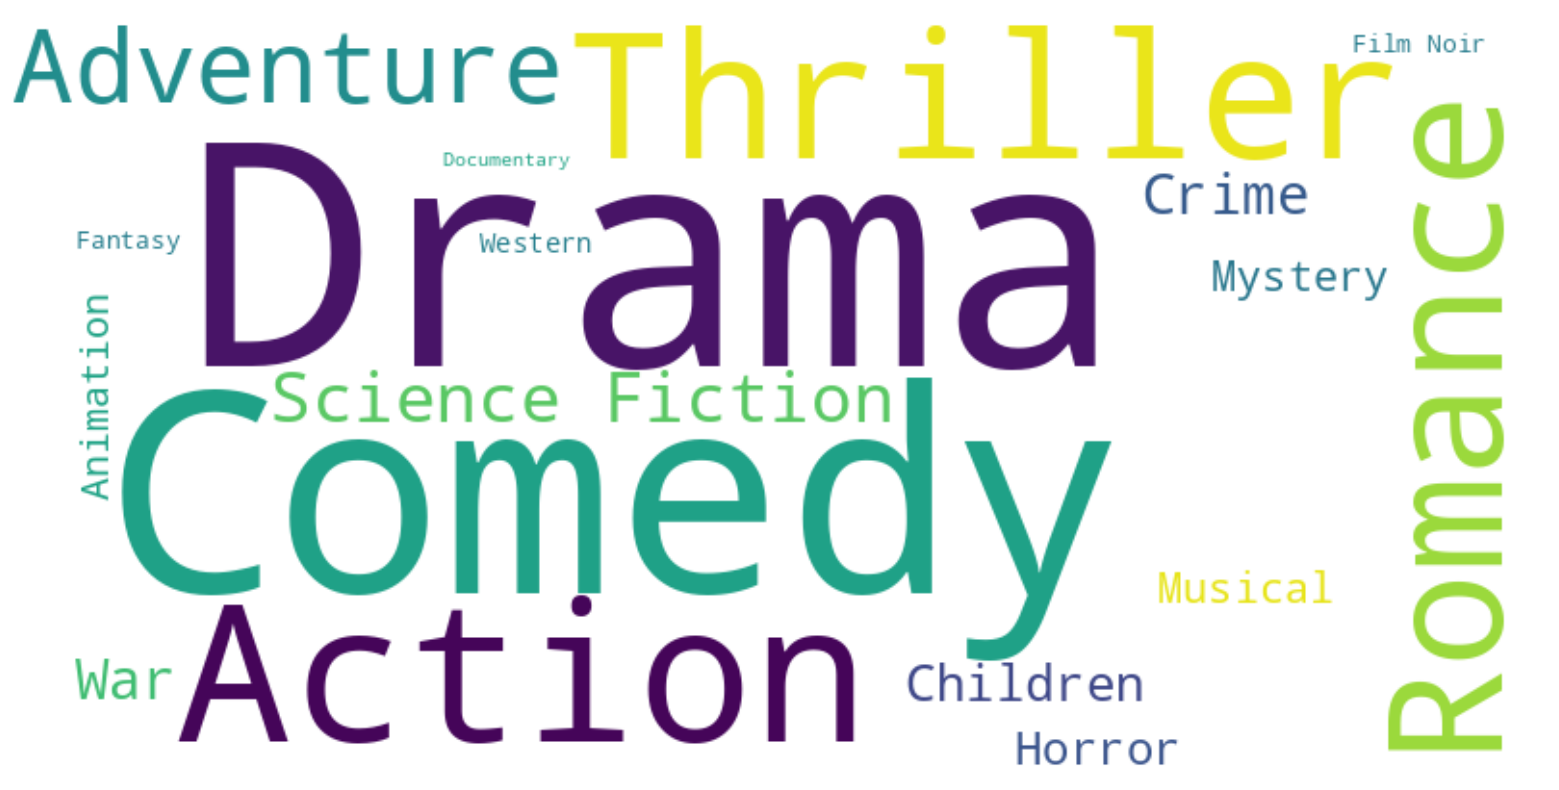

In [ ]:
# <20대가 많이 본 장르, 워드 클라우드 그래프 1>

#20대 인기 장르 값 딕셔너리 추출
# love_df['선호도'].to_dict()

data = {'Genre': [ 'Drama', 'Comedy', 'Action',
                  'Thriller', 'Romance', 'Adventure',
                   'Science Fiction', 'War', 'Crime',
                   'Children', 'Horror', 'Mystery',
                   'Musical', 'Animation', 'Western',
                   'Film Noir', 'Fantasy', 'Documentary'],
        'Preference': [14818, 12120, 10974, 9058, 7500, 5690,
                       5480, 3394, 3361, 2753, 2329, 1899,
                       1898, 1578, 697, 555, 546, 273]}

#데이터 프레임으로 변환
dic = dict(zip(data['Genre'], data['Preference']))
dic

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dic)

# 워드클라우드 출력
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# <워드클라우드 그래프2>

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  #워드클라우드
import numpy as np
from PIL import Image

text = open("/content/starwas.txt").read() #텍스트 불러오기
mask = np.array(Image.open("""
/content/Star Wars Clipart, Star Wars Silhouette,
Star Wars SVG, Star Wars PNG, Star Wars Cut, Star Wars Font.jpeg
"""))
#마스크 이미지 불러오기

stopwords = set(STOPWORDS) #stopwords 설정
stopwords.add("int")
stopwords.add("ext")

#워드 클라우드 옵션 설정
wc = WordCloud(max_words =400,
               mask = mask ,
               stopwords = stopwords,
               margin =2,
               random_state =1).generate(text)
default_colors = wc.to_array()

#출력 관련 컬러 및 사이즈 설정하기
import random
def grey_color_func(word, font_size, position, orientation, random_state =None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

plt.figure(figsize = (12, 12))
plt.imshow(wc.recolor(color_func = grey_color_func, random_state =3),
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

FileNotFoundError: ignored

In [ ]:
# user data 처리
# 우편번호 열 삭제 / 사용자아이디 열 -> 인덱스변환
uu = pd.read_csv('/content/drive/MyDrive/미니프로젝트 C 1조/u.user', sep = '|')
uu.drop('우편번호', axis = 1, inplace = True)
uu.set_index('사용자아이디', inplace = True)
uu

# apply 함수 사용하여 연령대 확인 가능한 열 생성
def age_categorize(age):
    age = (age // 10) * 10
    return age

uu['연령별 사람수'] = uu['나이'].apply(age_categorize)
uu

# 사람 수 체크할 수 있도록 데이터가 1인 counting human 열 생성
uu['counting human'] = 1

# plotly 사용하여 그래프 생성
fig = px.pie(uu, values = 'counting human', names = '연령별 사람수', title = '전체연령분포')

fig.update_traces(hole =.3,
                  marker_line_width = 2,
                  textposition = 'inside',
                  textinfo='label+percent+value',
                  textfont_size = 20,
                  pull=[0.1, 0, 0, 0,0,0,0])

fig.update_layout(
                title_x = 0.5,
                title_y = 0.9,
                title_xanchor = "center",
                title_yanchor = "middle",
                title_font_size = 30,
                title_font_color = "black",
                title_font_family = "family-font")
fig.show()